In [1]:
#importing Important Libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/class-grades.csv', header=None, sep = '\n')
df = df[0].str.split(',', expand=True)


# header=0--> deletes column names(header) and assign new column names(if we pass)
#expand = True --> the split elements will expand out into separate columns

# Dataset Description
Grades from a Chemical Engineering course at McMaster University.
Data source:	
The recorded values are the average of sub-components: e.g the Tutorial variable is the average of all tutorials, the Final exam variable is the average of all questions in the final, written exam.

The Prefix column is the year in which the student first enrolls at the university and is a crude approximation of the student's age (maturity).

This particular course permitted students to work in groups for assignments, tutorials and the take-home exam. The groups were self-selected, and varied during the semester.

Of interest is whether the assignments, tutorials, midterms or take-home exam are a good predictor of the student's performance in the final exam. Also, does the Prefix variable show any promise as a prediction variable?

In [3]:
df.head()

,0,1,2,3,4,5,6
0,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,None
1,05,57.14,34.09,64.38,51.48,52.50,None
2,08,95.05,105.49,67.50,99.07,68.33,None
3,08,83.70,83.17,30.0,63.15,48.89,None
4,07,81.22,96.06,49.38,105.93,80.56,None


In [ ]:
#header_row = 0
#df.columns = df.iloc[header_row]
#print(df)

Since Header (Column Names) are in first row of dataset, we need to Move that as Header

In [4]:
df.columns = df.iloc[0]
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,NaN
0,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,None
1,05,57.14,34.09,64.38,51.48,52.50,None
2,08,95.05,105.49,67.50,99.07,68.33,None
3,08,83.70,83.17,30.0,63.15,48.89,None
4,07,81.22,96.06,49.38,105.93,80.56,None


In [5]:
df.columns

Index(['Prefix', 'Assignment', 'Tutorial', 'Midterm', 'TakeHome', 'Final',
       None],
      dtype='object', name=0)

In [ ]:
#header_row = df.iloc[0]
#df.columns = header_row

In [6]:
header_row = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns=header_row)
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,NaN
0,05,57.14,34.09,64.38,51.48,52.50,None
1,08,95.05,105.49,67.50,99.07,68.33,None
2,08,83.70,83.17,30.0,63.15,48.89,None
3,07,81.22,96.06,49.38,105.93,80.56,None
4,08,91.32,93.64,95.0,107.41,73.89,None


In [7]:
df=df[df.columns.dropna()] #dropping Null Values

In [8]:
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,05,57.14,34.09,64.38,51.48,52.50
1,08,95.05,105.49,67.50,99.07,68.33
2,08,83.70,83.17,30.0,63.15,48.89
3,07,81.22,96.06,49.38,105.93,80.56
4,08,91.32,93.64,95.0,107.41,73.89


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Prefix      99 non-null     object
 1   Assignment  99 non-null     object
 2   Tutorial    99 non-null     object
 3   Midterm     99 non-null     object
 4   TakeHome    99 non-null     object
 5   Final       99 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


As we found that all the columns are type of object but must be of numeric according to dataset.
 So we will convert the data type object to numeric.

In [10]:
df['Prefix'] = pd.to_numeric(df['Prefix'])
df['Assignment'] = pd.to_numeric(df['Assignment'])
df['Tutorial'] = pd.to_numeric(df['Tutorial'])
df['Midterm'] = pd.to_numeric(df['Midterm'])
df['TakeHome'] = pd.to_numeric(df['TakeHome'])
df['Final'] = pd.to_numeric(df['Final'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      99 non-null     int64  
 1   Assignment  99 non-null     float64
 2   Tutorial    99 non-null     float64
 3   Midterm     99 non-null     float64
 4   TakeHome    98 non-null     float64
 5   Final       96 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


Checking if dataset contains duplicate values..?

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


There are no duplicates

In [13]:
#Shape of Dataset
print("Number of Instances: ",df.shape[0])
print("Number of Attributes: ", df.shape[1])

Number of Instances:  99
Number of Attributes:  6


Above code shows that dataset is of shape [99x6].
it means, there are 99 rows and 6 columns

In [14]:
df.describe()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
count,99.000000,99.000000,99.000000,99.000000,98.000000,96.000000
mean,7.313131,85.491717,89.731111,68.049495,80.828469,68.414375
std,0.932918,12.597694,15.071556,19.376074,23.808806,18.801087
min,4.000000,28.140000,34.090000,28.120000,16.910000,28.060000
25%,7.000000,80.875000,83.350000,52.810000,66.015000,53.122500
50%,8.000000,89.940000,93.100000,69.380000,87.960000,66.250000
75%,8.000000,95.000000,100.550000,82.810000,98.747500,84.167500
max,8.000000,100.830000,112.580000,110.000000,108.890000,108.890000


In [15]:
print("No. of missing values: ")
for col in df.columns:
  print('\t%s: %d' % (col,df[col].isna().sum()))

No. of missing values: 
	Prefix: 0
	Assignment: 0
	Tutorial: 0
	Midterm: 0
	TakeHome: 1
	Final: 3


In [16]:
df['TakeHome'] = df['TakeHome'].fillna(df['TakeHome'].mean())

In [17]:
df.Final = df.Final.fillna(df.Final.mean())

In [18]:
df.TakeHome.isna().sum()


0

In [19]:
df.Final.isna().sum()

0

# Outliers

In [20]:
df.head

<bound method NDFrame.head of 0   Prefix  Assignment  Tutorial  Midterm  TakeHome  Final
0        5       57.14     34.09    64.38     51.48  52.50
1        8       95.05    105.49    67.50     99.07  68.33
2        8       83.70     83.17    30.00     63.15  48.89
3        7       81.22     96.06    49.38    105.93  80.56
4        8       91.32     93.64    95.00    107.41  73.89
..     ...         ...       ...      ...       ...    ...
94       8       96.73    103.71    45.00     93.52  61.94
95       7       85.34     80.54    41.25     93.70  39.72
96       8       89.94    102.77    87.50     90.74  87.78
97       7       95.60     76.13    66.25     99.81  85.56
98       8       63.40     97.37    73.12     72.78  77.22

[99 rows x 6 columns]>

Prefix           AxesSubplot(0.125,0.536818;0.227941x0.343182)
Assignment    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Tutorial      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Midterm             AxesSubplot(0.125,0.125;0.227941x0.343182)
TakeHome         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Final            AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

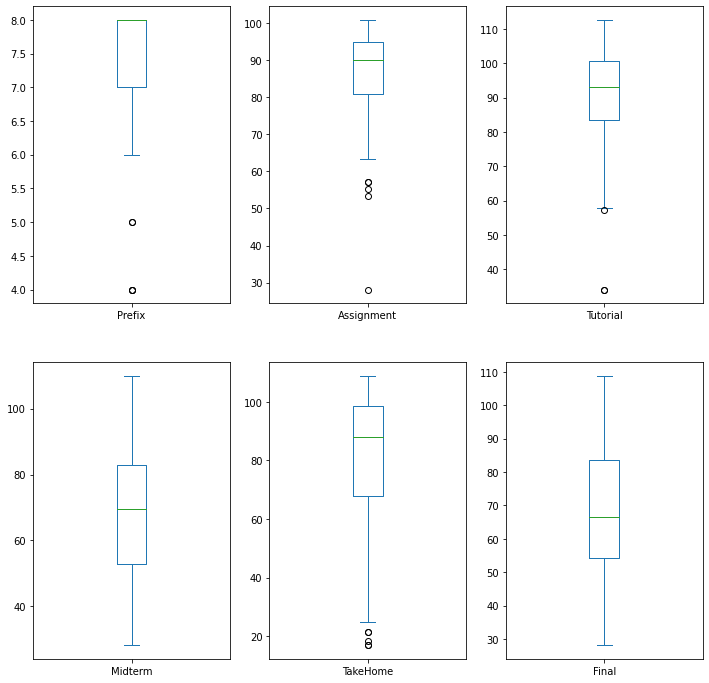

In [21]:
%matplotlib inline

df.plot(kind ='box', figsize=(12,12), layout=(2,3), sharex = True, 
        subplots = True)

# Z- Score
Z-score is basically tells that how far a point is from mean.


To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

Code:

The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [23]:
Z = (df-df.mean())/df.std()
Z[0:5]

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,-2.479458,-2.250548,-3.691796,-0.189383,-1.239011,-0.859722
1,0.736258,0.758733,1.045605,-0.028359,0.770107,-0.004558
2,0.736258,-0.142226,-0.435331,-1.963736,-0.746336,-1.054740
3,-0.335647,-0.339087,0.419923,-0.963533,1.059717,0.656127
4,0.736258,0.462647,0.259355,1.390917,1.122198,0.295803


In [27]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==6) & ((Z <= 3).sum(axis=1)==6),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 99
Number of rows after discarding missing values = 93


# Sampling
Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In [29]:
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In the following code, a sample of size 3 is randomly selected (without replacement) from the original data.

In [31]:
sample = df.sample(n=3)
sample

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
93,8,87.52,91.58,56.25,71.85,85.00
1,8,95.05,105.49,67.50,99.07,68.33
57,8,87.93,108.97,28.75,87.96,47.78


In the next example, we randomly select 1% of the data (without replacement) and display the selected samples. The random_state argument of the function specifies the seed value of the random number generator.

In [32]:
sample = df.sample(frac=0.01, random_state=1)
sample

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
92,7,95.6,82.28,76.88,108.33,78.33


Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

In [33]:
sample = df.sample(frac=0.01, replace=True, random_state=1)
sample


,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
37,7,89.89,57.97,32.5,85.19,51.67


# Discretization
Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods applied to the 'Assignment' attribute of the breast cancer dataset.

First, we plot a histogram that shows the distribution of the attribute values. The value_counts() function can also be applied to count the frequency of each attribute value.



57.14     2
95.05     3
83.70     2
81.22     2
91.32     2
95.00     3
72.85     2
84.26     3
90.10     1
80.44     2
86.26     3
97.16     2
91.28     3
84.80     2
93.83     3
92.01     2
55.14     1
93.04     1
63.40     2
75.27     3
63.78     1
53.36     1
82.45     1
91.62     1
98.58     3
67.29     1
85.42     1
88.09     1
89.89     1
90.74     1
28.14     1
95.14     2
68.95     2
85.01     1
95.90     1
92.46     1
96.73     2
71.79     3
87.93     3
92.02     3
90.33     1
97.00     2
93.01     1
100.83    1
80.53     1
90.98     1
93.59     1
97.33     3
66.17     1
74.29     1
86.86     1
95.60     3
98.49     1
74.35     1
86.29     1
96.41     1
87.52     1
85.34     1
89.94     1
Name: Assignment, dtype: int64

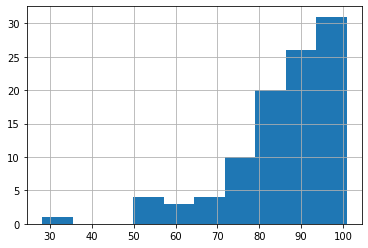

In [34]:
df['Assignment'].hist(bins=10)
df['Assignment'].value_counts(sort=False)

we can apply the cut() function to discretize the attribute into 4 bins of similar interval. The value_counts() function can be used to determine the number of instances in each bin.

In [36]:
bins = pd.cut(df['Assignment'],4)
bins.value_counts(sort=False)

(28.067, 46.312]     1
(46.312, 64.485]     7
(64.485, 82.658]    20
(82.658, 100.83]    71
Name: Assignment, dtype: int64

For the equal frequency method, the qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.

In [37]:
bins = pd.qcut(df['Assignment'],4)
bins.value_counts(sort=False)

(28.139, 80.875]    25
(80.875, 89.94]     25
(89.94, 95.0]       25
(95.0, 100.83]      24
Name: Assignment, dtype: int64

#to check distribution of data
Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. 
It is performed on continuous variables. 
This is the  plot  for the distribution of all the continuous variables in  the data set.
feature scaling to convert different scales to a standard scale 



In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
rescaledX = scaler.transform(df)
print(rescaledX)


[[-2.49207650e+00 -2.26200143e+00 -3.71058404e+00 -1.90346571e-01
  -1.24531600e+00 -8.64096841e-01]
 [ 7.40005249e-01  7.62594001e-01  1.05092584e+00 -2.85037808e-02
   7.74025713e-01 -4.58127768e-03]
 [ 7.40005249e-01 -1.42949606e-01 -4.37546154e-01 -1.97372963e+00
  -7.50133866e-01 -1.06010765e+00]
 [-3.37355334e-01 -3.40812879e-01  4.22059762e-01 -9.68436911e-01
   1.06510964e+00  6.59466438e-01]
 [ 7.40005249e-01  4.65001256e-01  2.60675253e-01  1.39799518e+00
   1.12790909e+00  2.97307954e-01]
 [-3.37355334e-01  7.58604822e-01  1.89986171e-01  1.30047452e+00
   7.19288357e-01 -1.92413662e-02]
 [ 7.40005249e-01  7.62594001e-01  8.84206309e-01 -6.12071536e-01
   7.74025713e-01 -9.99838401e-01]
 [-3.37355334e-01 -1.00860142e+00 -1.92135000e-01 -4.17548951e-01
   1.20599167e-15 -6.68086027e-01]
 [ 7.40005249e-01 -9.82708027e-02  2.24663834e-01 -1.06595757e+00
  -2.64387668e+00 -9.54772203e-01]
 [-3.37355334e-01  3.67665291e-01  5.21424604e-01 -8.71434982e-01
   3.42067347e-01 -2.6086